In [1]:
from datetime import date, datetime, timedelta

from simulator.binance.binance_k_line_repository import load_k_lines

interval_date_from: date = date(2023, 5, 1)
interval_date_to: date = date(2023, 5, 31)
interval_days = 31
interval_minutes = interval_days * 24 * 60

symbol: str = "ETHUSDT"

raw_k_lines = load_k_lines(symbol, interval_date_from, interval_date_to)

display(raw_k_lines)

,open_timestamp_millis,open_price,high_price,low_price,close_price,volume,close_timestamp_millis,quote_asset_volume,trades_count,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,1682899200000,1868.41,1871.06,1867.20,1869.44,20316.217,1682899259999,3.797542e+07,11692,11552.083,2.159521e+07,0
1,1682899260000,1869.44,1875.64,1869.34,1875.63,19738.657,1682899319999,3.698278e+07,10552,12767.284,2.391795e+07,0
2,1682899320000,1875.64,1875.64,1872.80,1872.80,12220.644,1682899379999,2.290880e+07,6146,4005.436,7.507829e+06,0
3,1682899380000,1872.81,1877.26,1872.55,1877.26,7275.710,1682899439999,1.364297e+07,6926,5023.121,9.419046e+06,0
4,1682899440000,1877.26,1881.39,1876.84,1880.40,14390.501,1682899499999,2.704258e+07,9779,9616.647,1.807247e+07,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1685577300000,1873.17,1874.41,1873.08,1874.41,4202.478,1685577359999,7.873024e+06,1590,2667.404,4.997601e+06,0
1436,1685577360000,1874.40,1874.41,1872.54,1872.80,3444.416,1685577419999,6.454170e+06,1565,401.812,7.527455e+05,0
1437,1685577420000,1872.81,1873.44,1872.64,1872.84,1423.699,1685577479999,2.666499e+06,1428,820.822,1.537314e+06,0
1438,1685577480000,1872.84,1872.95,1872.53,1872.83,820.012,1685577539999,1.535584e+06,910,353.406,6.618053e+05,0


In [2]:
import pandas as pd

k_lines = raw_k_lines[["close_price"]]
k_lines.index = pd.to_datetime(raw_k_lines["open_timestamp_millis"], unit="ms")
k_lines.index.name = "open_datetime"

k_lines

,close_price
open_datetime,
2023-05-01 00:00:00,1869.44
2023-05-01 00:01:00,1875.63
2023-05-01 00:02:00,1872.80
2023-05-01 00:03:00,1877.26
2023-05-01 00:04:00,1880.40
...,...
2023-05-31 23:55:00,1874.41
2023-05-31 23:56:00,1872.80
2023-05-31 23:57:00,1872.84


In [3]:
from numpy import float16, float64

# TODO: revivce disabled validations

# assert len(k_lines) == interval_minutes

assert len(k_lines[k_lines.isna().any(axis=1)]) == 0
assert len(k_lines[k_lines.isnull().any(axis=1)]) == 0

assert k_lines.dtypes["close_price"] == float64
assert len(k_lines[k_lines["close_price"] <= 0]) == 0

# display(
#     (
#     (k_lines.index.to_series() - k_lines.index.to_series().shift(1))
#     .iloc[1:]
#     .dt.total_seconds()
#     ).value_counts()

# )

# assert (
#     (k_lines.index.to_series() - k_lines.index.to_series().shift(1))
#     .iloc[1:]
#     .dt.total_seconds()
#     == 60
# ).all()

<Axes: xlabel='open_datetime'>

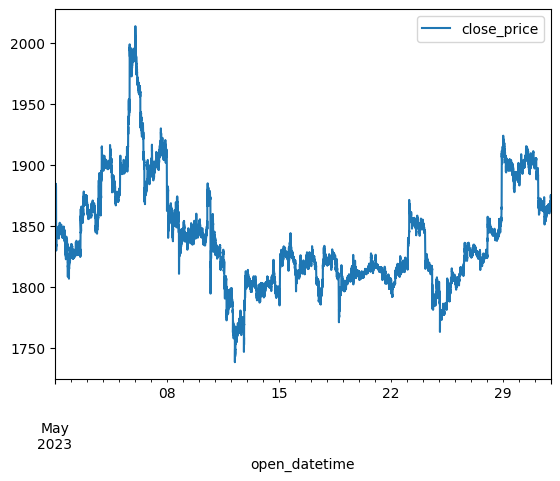

In [4]:
k_lines.plot.line(use_index=True)

In [5]:
k_lines_features = k_lines.copy()

k_lines_features["previous_close_price_mean_1_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(1).mean()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_mean_2_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(2).mean()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_mean_4_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(4).mean()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_mean_8_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(8).mean()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_mean_16_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(16).mean()
    / k_lines_features["close_price"]
)

k_lines_features["previous_close_price_std_2_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(2).std()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_std_4_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(4).std()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_std_8_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(8).std()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_std_16_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(16).std()
    / k_lines_features["close_price"]
)

k_lines_features["previous_close_price_min_2_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(2).min()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_min_4_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(4).min()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_min_8_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(8).min()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_min_16_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(16).min()
    / k_lines_features["close_price"]
)

k_lines_features["previous_close_price_max_2_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(2).max()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_max_4_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(4).max()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_max_8_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(8).max()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_max_16_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(16).max()
    / k_lines_features["close_price"]
)


k_lines_features["is_next_close_price_greater"] = (
    k_lines_features["close_price"]
    .shift(-1)
    .rolling(2)
    .apply(lambda x: x.iloc[1] > x.iloc[0])
)

k_lines_features.dropna(inplace=True)

display(k_lines_features)

,close_price,previous_close_price_mean_1_ratio,previous_close_price_mean_2_ratio,previous_close_price_mean_4_ratio,previous_close_price_mean_8_ratio,previous_close_price_mean_16_ratio,previous_close_price_std_2_ratio,previous_close_price_std_4_ratio,previous_close_price_std_8_ratio,previous_close_price_std_16_ratio,previous_close_price_min_2_ratio,previous_close_price_min_4_ratio,previous_close_price_min_8_ratio,previous_close_price_min_16_ratio,previous_close_price_max_2_ratio,previous_close_price_max_4_ratio,previous_close_price_max_8_ratio,previous_close_price_max_16_ratio,is_next_close_price_greater
open_datetime,,,,,,,,,,,,,,,,,,,
2023-05-01 00:16:00,1880.48,0.999872,0.999617,0.999201,0.999047,0.998429,0.000361,0.000550,0.000544,0.001510,0.999362,0.998580,0.998240,0.994129,0.999872,0.999872,0.999872,0.999957,1.0
2023-05-01 00:17:00,1880.91,0.999771,0.999708,0.999225,0.999038,0.998567,0.000090,0.000644,0.000527,0.001033,0.999644,0.998352,0.998352,0.995688,0.999771,0.999771,0.999771,0.999771,1.0
2023-05-01 00:18:00,1881.59,0.999639,0.999524,0.999276,0.998825,0.998382,0.000162,0.000367,0.000615,0.001022,0.999410,0.998772,0.997991,0.995328,0.999639,0.999639,0.999639,0.999639,0.0
2023-05-01 00:19:00,1879.16,1.001293,1.001112,1.000875,1.000241,0.999965,0.000256,0.000315,0.000745,0.000713,1.000931,1.000575,0.999282,0.998941,1.001293,1.001293,1.001293,1.001293,1.0
2023-05-01 00:20:00,1879.35,0.999899,1.000545,1.000631,1.000216,0.999927,0.000914,0.000545,0.000673,0.000664,0.999899,0.999899,0.999181,0.998840,1.001192,1.001192,1.001192,1.001192,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31 23:54:00,1873.18,1.000016,1.000096,1.000312,1.000352,0.999961,0.000113,0.000374,0.000310,0.000927,1.000016,1.000016,1.000016,0.998350,1.000176,1.000860,1.000860,1.001265,1.0
2023-05-31 23:55:00,1874.41,0.999344,0.999352,0.999441,0.999595,0.999408,0.000011,0.000104,0.000269,0.000821,0.999344,0.999344,0.999344,0.998031,0.999360,0.999541,1.000203,1.000608,0.0
2023-05-31 23:56:00,1872.80,1.000860,1.000531,1.000415,1.000505,1.000390,0.000464,0.000307,0.000305,0.000746,1.000203,1.000203,1.000203,0.998889,1.000860,1.000860,1.001063,1.001468,1.0


In [6]:
test_k_lines_ratio = 0.2
test_k_lines_count = round(test_k_lines_ratio * len(k_lines_features))

train_k_lines_features = k_lines_features.iloc[:-test_k_lines_count]
test_k_lines_features = k_lines_features.iloc[-test_k_lines_count:]

display(train_k_lines_features)
display(test_k_lines_features)

,close_price,previous_close_price_mean_1_ratio,previous_close_price_mean_2_ratio,previous_close_price_mean_4_ratio,previous_close_price_mean_8_ratio,previous_close_price_mean_16_ratio,previous_close_price_std_2_ratio,previous_close_price_std_4_ratio,previous_close_price_std_8_ratio,previous_close_price_std_16_ratio,previous_close_price_min_2_ratio,previous_close_price_min_4_ratio,previous_close_price_min_8_ratio,previous_close_price_min_16_ratio,previous_close_price_max_2_ratio,previous_close_price_max_4_ratio,previous_close_price_max_8_ratio,previous_close_price_max_16_ratio,is_next_close_price_greater
open_datetime,,,,,,,,,,,,,,,,,,,
2023-05-01 00:16:00,1880.48,0.999872,0.999617,0.999201,0.999047,0.998429,0.000361,0.000550,0.000544,0.001510,0.999362,0.998580,0.998240,0.994129,0.999872,0.999872,0.999872,0.999957,1.0
2023-05-01 00:17:00,1880.91,0.999771,0.999708,0.999225,0.999038,0.998567,0.000090,0.000644,0.000527,0.001033,0.999644,0.998352,0.998352,0.995688,0.999771,0.999771,0.999771,0.999771,1.0
2023-05-01 00:18:00,1881.59,0.999639,0.999524,0.999276,0.998825,0.998382,0.000162,0.000367,0.000615,0.001022,0.999410,0.998772,0.997991,0.995328,0.999639,0.999639,0.999639,0.999639,0.0
2023-05-01 00:19:00,1879.16,1.001293,1.001112,1.000875,1.000241,0.999965,0.000256,0.000315,0.000745,0.000713,1.000931,1.000575,0.999282,0.998941,1.001293,1.001293,1.001293,1.001293,1.0
2023-05-01 00:20:00,1879.35,0.999899,1.000545,1.000631,1.000216,0.999927,0.000914,0.000545,0.000673,0.000664,0.999899,0.999899,0.999181,0.998840,1.001192,1.001192,1.001192,1.001192,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-25 19:09:00,1808.45,0.999126,0.998847,0.998875,0.998325,0.998023,0.000395,0.000692,0.000772,0.000623,0.998568,0.998103,0.997324,0.997324,0.999126,0.999701,0.999701,0.999701,1.0
2023-05-25 19:10:00,1814.68,0.996567,0.996132,0.995918,0.995160,0.994748,0.000616,0.000632,0.000940,0.000778,0.995696,0.995140,0.993900,0.993900,0.996567,0.996567,0.996567,0.996567,1.0
2023-05-25 19:11:00,1815.46,0.999570,0.997855,0.996422,0.995495,0.994679,0.002427,0.002179,0.001827,0.001513,0.996139,0.994712,0.993941,0.993473,0.999570,0.999570,0.999570,0.999570,0.0


,close_price,previous_close_price_mean_1_ratio,previous_close_price_mean_2_ratio,previous_close_price_mean_4_ratio,previous_close_price_mean_8_ratio,previous_close_price_mean_16_ratio,previous_close_price_std_2_ratio,previous_close_price_std_4_ratio,previous_close_price_std_8_ratio,previous_close_price_std_16_ratio,previous_close_price_min_2_ratio,previous_close_price_min_4_ratio,previous_close_price_min_8_ratio,previous_close_price_min_16_ratio,previous_close_price_max_2_ratio,previous_close_price_max_4_ratio,previous_close_price_max_8_ratio,previous_close_price_max_16_ratio,is_next_close_price_greater
open_datetime,,,,,,,,,,,,,,,,,,,
2023-05-25 19:14:00,1813.18,0.999575,0.999752,1.000397,0.998570,0.996909,0.000250,0.000779,0.002061,0.002226,0.999575,0.999575,0.995963,0.994722,0.999928,1.001257,1.001257,1.001257,1.0
2023-05-25 19:15:00,1815.00,0.998997,0.998785,0.999187,0.997931,0.996204,0.000300,0.000735,0.002018,0.002304,0.998573,0.998573,0.994964,0.993725,0.998997,1.000253,1.000253,1.000253,0.0
2023-05-25 19:16:00,1812.79,1.001219,1.000717,1.000342,0.999778,0.997771,0.000710,0.000613,0.001726,0.002434,1.000215,0.999790,0.996734,0.994936,1.001219,1.001219,1.001473,1.001473,0.0
2023-05-25 19:17:00,1811.32,1.000812,1.001422,1.001118,1.000998,0.998870,0.000863,0.000633,0.001214,0.002407,1.000812,1.000602,0.998416,0.995743,1.002032,1.002032,1.002286,1.002286,0.0
2023-05-25 19:18:00,1811.20,1.000066,1.000472,1.001034,1.001262,0.999167,0.000574,0.000836,0.000787,0.002321,1.000066,1.000066,1.000066,0.995809,1.000878,1.002098,1.002352,1.002352,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31 23:54:00,1873.18,1.000016,1.000096,1.000312,1.000352,0.999961,0.000113,0.000374,0.000310,0.000927,1.000016,1.000016,1.000016,0.998350,1.000176,1.000860,1.000860,1.001265,1.0
2023-05-31 23:55:00,1874.41,0.999344,0.999352,0.999441,0.999595,0.999408,0.000011,0.000104,0.000269,0.000821,0.999344,0.999344,0.999344,0.998031,0.999360,0.999541,1.000203,1.000608,0.0
2023-05-31 23:56:00,1872.80,1.000860,1.000531,1.000415,1.000505,1.000390,0.000464,0.000307,0.000305,0.000746,1.000203,1.000203,1.000203,0.998889,1.000860,1.000860,1.001063,1.001468,1.0


In [7]:
from sklearn.ensemble import RandomForestClassifier

model_input_columns = [
    "close_price",
    "previous_close_price_mean_1_ratio",
    "previous_close_price_mean_2_ratio",
    "previous_close_price_mean_4_ratio",
    "previous_close_price_mean_8_ratio",
    "previous_close_price_mean_16_ratio",
    "previous_close_price_std_2_ratio",
    "previous_close_price_std_4_ratio",
    "previous_close_price_std_8_ratio",
    "previous_close_price_std_16_ratio",
    "previous_close_price_min_2_ratio",
    "previous_close_price_min_4_ratio",
    "previous_close_price_min_8_ratio",
    "previous_close_price_min_16_ratio",
    "previous_close_price_max_2_ratio",
    "previous_close_price_max_4_ratio",
    "previous_close_price_max_8_ratio",
    "previous_close_price_max_16_ratio",
]
model_target_column = "is_next_close_price_greater"

model_train_input_values = train_k_lines_features[model_input_columns]
model_train_target_values = train_k_lines_features[model_target_column]
model_test_input_values = test_k_lines_features[model_input_columns]
model_test_target_values = test_k_lines_features[model_target_column]

model = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=300,
    random_state=1,
)
model.fit(model_train_input_values, model_train_target_values)

model_test_predicted_values = pd.Series(
    model.predict(model_test_input_values), index=test_k_lines_features.index
)
model_train_predicted_values = pd.Series(
    model.predict(model_train_input_values), index=train_k_lines_features.index
)

model_test_predicted_values.name = f"predicted_{model_target_column}"
model_test_target_and_predicted_values = pd.concat(
    [model_test_target_values, model_test_predicted_values], axis=1
)
# display(model_test_target_and_predicted_values)

In [8]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

display(
    "test_accuracy_score = "
    + str(accuracy_score(model_test_target_values, model_test_predicted_values))
)

display(
    "train_accuracy_score = "
    + str(accuracy_score(model_train_target_values, model_train_predicted_values))
)

display(
    "test_precision_score = "
    + str(precision_score(model_test_target_values, model_test_predicted_values))
)

display(
    "train_precision_score = "
    + str(precision_score(model_train_target_values, model_train_predicted_values))
)


# display(precision_score(model_test_target_values, model_test_predicted_values))
# display(recall_score(model_test_target_values, model_test_predicted_values))
# display(f1_score(model_test_target_values, model_test_predicted_values))

'test_accuracy_score = 0.5228011204481793'

'train_accuracy_score = 0.696089416774049'

'test_precision_score = 0.523993144815767'

'train_precision_score = 0.7479145940154588'

In [9]:
display(
    pd.concat(
        [
            model_test_target_values.value_counts(),
            model_test_predicted_values.value_counts(),
        ],
        axis=1,
    )
)

,is_next_close_price_greater,predicted_is_next_close_price_greater
0.0,4554,6591
1.0,4371,2334
